In [ ]:
#Feature Engineering Demo with Diamonds Dataset

In [1]:
import numpy as np
import pandas as pd  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# reading the CSV file into pandas dataframe
dia = pd.read_csv("file:///C:/Users/RIKKI/Desktop/Notes/Datasets/05_Diamonds.csv")  

In [5]:
# Check top few records to get a feel of the data structure
dia.head(7)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [6]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
dia.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Text(0, 0.5, 'Price')

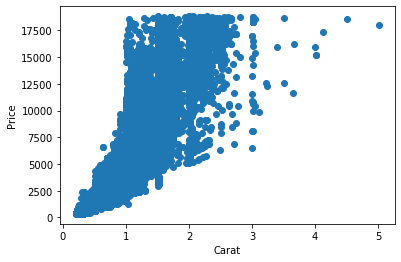

In [8]:
plt.scatter(dia.carat, dia.price, )
plt.xlabel('Carat')
plt.ylabel('Price')

Text(0, 0.5, 'Log Price')

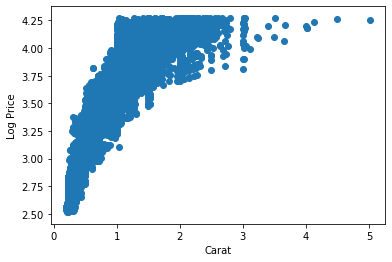

In [9]:
dia['logPrice']=np.log10(dia['price'])
plt.scatter(dia.carat, dia.logPrice, )
plt.xlabel('Carat')
plt.ylabel('Log Price')


In [10]:
x = dia[['carat']]
y = dia['price']

In [11]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [12]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Train R^2
print(regression_model.score(x_train, y_train))

0.8493164852062774


In [14]:
# Test R^2
print(regression_model.score(x_test, y_test))

0.8493196667739158


In [15]:
# Train MSE
predictedPrice = regression_model.predict(x_train)
print(mean_squared_error(predictedPrice, y_train))

2435246.6832437012


In [16]:
# Test MSE
predictedPrice = regression_model.predict(x_test)
print(mean_squared_error(predictedPrice, y_test))

2311408.505558712


In [17]:
x = dia[['carat']]
y = dia['logPrice']

In [18]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [19]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Train R^2
print(regression_model.score(x_train, y_train))

0.8448789655221723


In [21]:
# Test R^2
print(regression_model.score(x_test, y_test))

0.8512992539867695


In [22]:
# Train MSE
predictedPrice = regression_model.predict(x_train)
print(mean_squared_error(predictedPrice, y_train))

0.030409698141313158


In [23]:
# Test MSE
predictedPrice = regression_model.predict(x_test)
print(mean_squared_error(predictedPrice, y_test))

0.028226766920597765


Text(0, 0.5, 'Log Price')

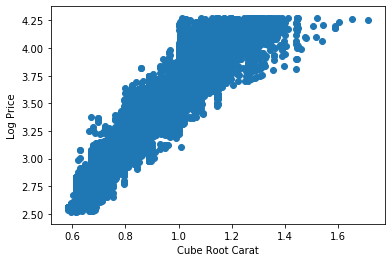

In [24]:
dia['cbrtCarat']=np.cbrt(dia['carat'])

plt.scatter(dia.cbrtCarat, dia.logPrice, )
plt.xlabel('Cube Root Carat')
plt.ylabel('Log Price')

In [25]:
x = dia[['cbrtCarat']]
y = dia['logPrice']

In [26]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [27]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Train R^2
print(regression_model.score(x_train, y_train))

0.9231921095763808


In [29]:
# Test R^2
print(regression_model.score(x_test, y_test))

0.9245630695086475


In [30]:
# Train MSE
predictedPrice = regression_model.predict(x_train)
print(mean_squared_error(predictedPrice, y_train))

0.01505730522308485


In [31]:
## Building a full model

In [32]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
logPrice      53940 non-null float64
cbrtCarat     53940 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 5.3+ MB


In [33]:
diafull = pd.get_dummies(dia, prefix_sep='_', drop_first=True)

In [34]:
diafull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
Unnamed: 0       53940 non-null int64
carat            53940 non-null float64
depth            53940 non-null float64
table            53940 non-null float64
price            53940 non-null int64
x                53940 non-null float64
y                53940 non-null float64
z                53940 non-null float64
logPrice         53940 non-null float64
cbrtCarat        53940 non-null float64
cut_Good         53940 non-null uint8
cut_Ideal        53940 non-null uint8
cut_Premium      53940 non-null uint8
cut_Very Good    53940 non-null uint8
color_E          53940 non-null uint8
color_F          53940 non-null uint8
color_G          53940 non-null uint8
color_H          53940 non-null uint8
color_I          53940 non-null uint8
color_J          53940 non-null uint8
clarity_IF       53940 non-null uint8
clarity_SI1      53940 non-null uint8
clarity_SI2      53940 non-null uint8
c

In [35]:
x = diafull.drop(['cbrtCarat','logPrice',"Unnamed: 0",'price'], axis=1)

In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 23 columns):
carat            53940 non-null float64
depth            53940 non-null float64
table            53940 non-null float64
x                53940 non-null float64
y                53940 non-null float64
z                53940 non-null float64
cut_Good         53940 non-null uint8
cut_Ideal        53940 non-null uint8
cut_Premium      53940 non-null uint8
cut_Very Good    53940 non-null uint8
color_E          53940 non-null uint8
color_F          53940 non-null uint8
color_G          53940 non-null uint8
color_H          53940 non-null uint8
color_I          53940 non-null uint8
color_J          53940 non-null uint8
clarity_IF       53940 non-null uint8
clarity_SI1      53940 non-null uint8
clarity_SI2      53940 non-null uint8
clarity_VS1      53940 non-null uint8
clarity_VS2      53940 non-null uint8
clarity_VVS1     53940 non-null uint8
clarity_VVS2     53940 non-null uint8
dtype

In [37]:
y = diafull['price']

In [38]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [39]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print(regression_model.score(x_train, y_train))

0.9189349877290273


In [41]:
# Import linear models
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Create lasso and ridge objects
lasso = linear_model.Lasso()
ridge = linear_model.Ridge()
# Fit the models
lasso.fit(x_train, y_train)
ridge.fit(x_train, y_train)
# Print scores, MSE, and coefficients
print("lasso score:", lasso.score(x_train, y_train))
print("ridge score:",ridge.score(x_train, y_train))
print("lasso MSE:", mean_squared_error(y_test, lasso.predict(x_test)))
print("ridge MSE:", mean_squared_error(y_test, ridge.predict(x_test)))
print("lasso coef:", lasso.coef_)
print("ridge coef:", ridge.coef_)

lasso score: 0.9186375659775474
ridge score: 0.9189310567756602
lasso MSE: 1202743.173687309
ridge MSE: 1200683.1938703
lasso coef: [10876.14754394   -64.63626148   -28.72360998  -882.73050571
    -0.            -0.           495.01807379   745.76944488
   674.52933797   651.84010737  -164.93893856  -216.22345934
  -434.29804582  -932.4582272  -1389.42700402 -2299.31647775
  4905.83180714  3212.96849254  2271.2312362   4134.46458369
  3818.29433167  4562.51244904  4497.09512778]
ridge coef: [ 1.10155324e+04 -5.81697305e+01 -2.55734449e+01 -9.18961500e+02
 -1.52963897e-01 -1.76838626e+01  6.04251378e+02  8.52879709e+02
  7.81094937e+02  7.54669513e+02 -2.17443837e+02 -2.68117652e+02
 -4.89841011e+02 -9.89294696e+02 -1.45587206e+03 -2.37705039e+03
  5.40081471e+03  3.67364499e+03  2.72786894e+03  4.60456823e+03
  4.28163748e+03  5.04138057e+03  4.96982670e+03]


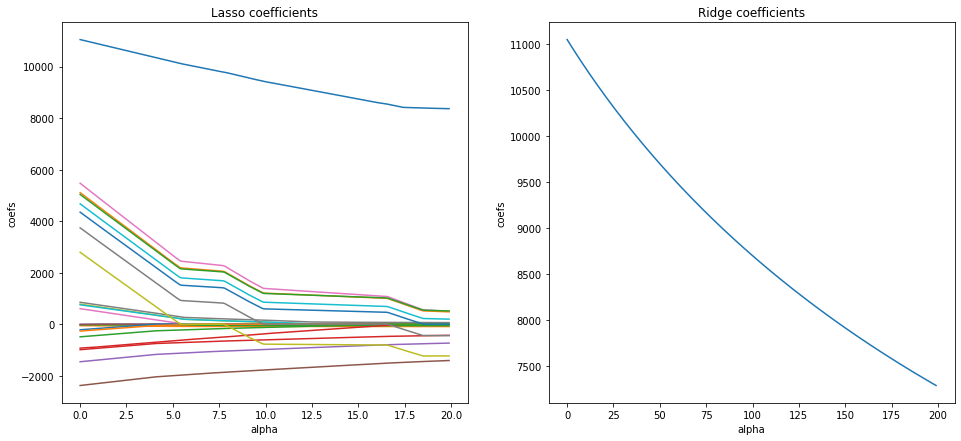

In [42]:
# Import library for visualization
import matplotlib.pyplot as plt
coefsLasso = []
coefsRidge = []
# Build Ridge and Lasso for 200 values of alpha and write the coefficients into array
alphasLasso = np.arange (0, 20, 0.1)
alphasRidge = np.arange (0, 200, 1)
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(x_train, y_train)
    coefsLasso.append(lasso.coef_)
    ridge = linear_model.Ridge(alpha=alphasRidge[i])
    ridge.fit(x_train, y_train)
    coefsRidge.append(ridge.coef_[0])

# Build Lasso and Ridge coefficient plots
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.subplot(122)
plt.plot(alphasRidge, coefsRidge)
plt.title('Ridge coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

In [102]:
df = pd.read_csv("file:///C:/Users/RIKKI/Desktop/Notes/Datasets/Computers.csv")  

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
Unnamed: 0    6259 non-null int64
price         6259 non-null int64
speed         6259 non-null int64
hd            6259 non-null int64
ram           6259 non-null int64
screen        6259 non-null int64
cd            6259 non-null object
multi         6259 non-null object
premium       6259 non-null object
ads           6259 non-null int64
dtypes: int64(7), object(3)
memory usage: 489.1+ KB


In [104]:
df.describe()

,Unnamed: 0,price,speed,hd,ram,screen,ads
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000
max,6259.000000,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000


In [105]:
df.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads
0,1,1499,25,80,4,14,no,no,yes,94
1,2,1795,33,85,2,14,no,no,yes,94
2,3,1595,25,170,4,15,no,no,yes,94
3,4,1849,25,170,8,14,no,no,no,94
4,5,3295,33,340,16,14,no,no,yes,94


In [106]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [107]:
for col in df.columns: 
    if df[col].dtype == 'object': 
        print('\n')
        print('Column Name:',col)
        print(pd.Categorical(df[col].unique()))
        print(pd.Categorical(df[col].unique()).codes)
        df[col] = pd.Categorical(df[col]).codes



Column Name: cd
[no, yes]
Categories (2, object): [no, yes]
[0 1]


Column Name: multi
[no, yes]
Categories (2, object): [no, yes]
[0 1]


Column Name: premium
[yes, no]
Categories (2, object): [no, yes]
[1 0]


In [108]:
X=df.drop('price',axis=1)  
Y=df.pop('price')

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=1)

In [98]:
data_train=pd.concat([X_train,y_train],axis=1)

In [99]:
data_test=pd.concat([X_test,y_test],axis=1)

In [100]:
data_train.head()

,speed,hd,ram,screen,cd,multi,premium,ads,price
1177,66,540,16,14,0,0,1,298,3244
3766,33,210,4,14,1,0,1,273,1399
3806,100,426,8,14,1,1,1,273,2543
4316,66,270,4,15,0,0,0,248,3208
4674,66,420,8,14,1,1,1,205,2099


In [110]:
clf=LinearRegression()

In [111]:
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
for idx,col_name in enumerate(X_train.columns):
    print('The coefficient for {}  is {} '.format(col_name,clf.coef_[idx]))

The coefficient for speed  is 6.090389155457373 
The coefficient for hd  is -0.328220159067735 
The coefficient for ram  is 78.20965090947973 
The coefficient for screen  is 99.77147690640264 
The coefficient for cd  is -106.0561676061263 
The coefficient for multi  is 13.964920539743252 
The coefficient for premium  is -372.40792567251174 
The coefficient for ads  is 1.2755357510591134 


In [113]:
intercept=clf.intercept_
intercept

33.111796679225336

In [114]:
clf.score(X_train,y_train)

0.5297002608207861

In [115]:
clf.score(X_test,y_test)

0.5333644796736867

In [116]:
import math

In [117]:
mse_test=np.mean((clf.predict(X_test)-y_test)**2)
mse_train=np.mean(clf.predict(X_train)-y_train)**2
#Calculating Mean Squared Error
print('MSE for training is {} and testing is {}'.format(mse_train,mse_test))

MSE for training is 1.2969631380364267e-25 and testing is 162198.9165295926


In [118]:
print('Root mean squared error for training is {} and Testing is {}'.format(math.sqrt(mse_train),math.sqrt(mse_test)))

Root mean squared error for training is 3.601337443279131e-13 and Testing is 402.7392661879303


In [130]:
lasso = linear_model.Lasso(alpha=50)
ridge = linear_model.Ridge(alpha=100)

In [131]:
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [128]:
for idx,col_name in enumerate(X_train.columns):
    print('The coefficient for {}  is {} '.format(col_name,clf.coef_[idx].round(1)))

The coefficient for speed  is 6.1 
The coefficient for hd  is -0.3 
The coefficient for ram  is 78.2 
The coefficient for screen  is 99.8 
The coefficient for cd  is -106.1 
The coefficient for multi  is 14.0 
The coefficient for premium  is -372.4 
The coefficient for ads  is 1.3 


In [133]:
print("lasso score:", lasso.score(X_train, y_train))
print("ridge score:",ridge.score(X_train, y_train))
print("lasso MSE:", mean_squared_error(y_test, lasso.predict(X_test)))
print("ridge MSE:", mean_squared_error(y_test, ridge.predict(X_test)))
print("lasso coef:", lasso.coef_.round(1))
print("ridge coef:", ridge.coef_.round(1))

lasso score: 0.47806168014182304
ridge score: 0.5279610734577485
lasso MSE: 180735.8144666918
ridge MSE: 162561.73666548412
lasso coef: [ 5.6 -0.3 71.  42.8 -0.  -0.  -0.   1.4]
ridge coef: [   6.    -0.3   77.3   98.2  -96.     0.4 -288.7    1.3]


In [135]:
lasso.intercept_

539.581714450715

In [136]:
ridge.intercept_

-16.93663969937961

In [134]:
print("lasso score:", lasso.score(X_test, y_test))
print("ridge score:",ridge.score(X_test, y_test))
print("lasso MSE:", mean_squared_error(y_test, lasso.predict(X_test)))
print("ridge MSE:", mean_squared_error(y_test, ridge.predict(X_test)))
print("lasso coef:", lasso.coef_.round(1))
print("ridge coef:", ridge.coef_.round(1))

lasso score: 0.48003505430396803
ridge score: 0.5323206702172543
lasso MSE: 180735.8144666918
ridge MSE: 162561.73666548412
lasso coef: [ 5.6 -0.3 71.  42.8 -0.  -0.  -0.   1.4]
ridge coef: [   6.    -0.3   77.3   98.2  -96.     0.4 -288.7    1.3]


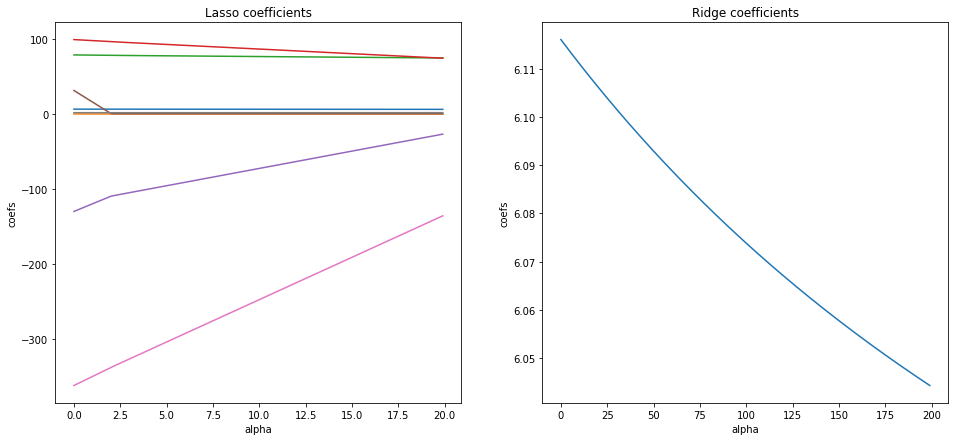

In [64]:
import matplotlib.pyplot as plt
coefsLasso = []
coefsRidge = []
# Build Ridge and Lasso for 200 values of alpha and write the coefficients into array
alphasLasso = np.arange (0, 20, 0.1)
alphasRidge = np.arange (0, 200, 1)
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_)
    ridge = linear_model.Ridge(alpha=alphasRidge[i])
    ridge.fit(X_train, y_train)
    coefsRidge.append(ridge.coef_[0])

# Build Lasso and Ridge coefficient plots
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.subplot(122)
plt.plot(alphasRidge, coefsRidge)
plt.title('Ridge coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

In [ ]:
expr= 'orders ~ week+final_price+area_range+website_homepage_mention_1+food_category_Biryani+food_category_Desert+food_category_Extras+food_category_Other_Snacks+food_category_Pasta+food_category_Pizza+food_category_Rice_Bowl+food_category_Salad+food_category_Sandwich+food_category_Seafood+food_category_Soup+food_category_Starters+cuisine_Indian+cuisine_Italian+center_type_Gurgaon+center_type_Noida+home_delivery_1+night_service_1'

In [101]:
import statsmodels.formula.api as smf

In [ ]:
lm_train = smf.ols(formula='price ~ carat + cut + color + clarity + depth + table + x + y + z ',data=data_train).fit()